<a href="https://colab.research.google.com/github/swordwalid/Assignment-/blob/main/Assignment_Task_ANTT_Robotics_Remaining_Portion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Here will read data from sheet 2,sheet 3,sheet 4,sheet 5,sheet 6.

## **Data Issues:**
## 1. Dataset lacks a label or feature representing machine health status, impeding supervised learning tasks.
## 2. Domain-specific information about machines and their operation is unavailable, limiting meaningful analysis in unsupervised approaches.

## **Given Tasks:**
## **Data Analysis and Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Read from sheet 2
sheet2_data = pd.read_excel('/content/drive/MyDrive/Data/Pallet Washing Machine.xlsx', sheet_name=1)  # Indexing starts from 0

# Read from  sheet 3
sheet3_data = pd.read_excel('/content/drive/MyDrive/Data/Pallet Washing Machine.xlsx', sheet_name=2)

# Read from sheet 4
sheet4_data = pd.read_excel('/content/drive/MyDrive/Data/Pallet Washing Machine.xlsx', sheet_name=3)

# Read from sheet 5
sheet5_data = pd.read_excel('/content/drive/MyDrive/Data/Pallet Washing Machine.xlsx', sheet_name=4)

# Read from sheet 6
sheet6_data = pd.read_excel('/content/drive/MyDrive/Data/Pallet Washing Machine.xlsx', sheet_name=5)



## First we will start by handling missing values in each data sheet and then we will check for outliers

##### Sheet 2 data

In [ ]:
# Finding out the features(columns) and corresponding datatypes in our data
for col in sheet2_data.columns:
  print(col)
print("data types:\n",sheet2_data.dtypes)

device
time
tempC1
peak1
peak2
peak3
data types:
 device    object
time      object
tempC1     int64
peak1      int64
peak2      int64
peak3      int64
dtype: object


In [ ]:
# finding missing values

In [ ]:
# Here we will check for missing values in our entire data
null=pd.isnull(sheet2_data)
null.sum().sum()

0

In [ ]:
missing_vals=['NA','',None,np.NaN]
missing=sheet2_data.isin(missing_vals)
missing.sum().sum()

0

###### comment: There is no missing value in the dataset of sheet 2

### Here we will define some Generalized functions to analyze data distribution and handling outliers and significant issues in data

In [ ]:
# Generalized function to detect and visualize outliers
def find_outliers(data, sensor_name="default_sensor"):
    if not isinstance(data, pd.DataFrame):
        raise TypeError("`data` must be a pandas DataFrame.")
    if not isinstance(sensor_name, str):
        raise TypeError("`sensor_name` must be a string.")
    sensor_data = data[sensor_name]
    Q1 = sensor_data.quantile(0.25)
    Q3 = sensor_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = sensor_data[(sensor_data < lower_bound) | (sensor_data > upper_bound)]

    plt.figure(figsize=(10, 6))

    # histogram of original data
    plt.subplot(1, 2, 1)
    plt.hist(sensor_data, bins=30, color='blue', alpha=0.7)
    plt.axvline(Q1, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(Q3, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(lower_bound, color='yellow', linestyle='dashed', linewidth=2, label='Lower Bound')
    plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='Upper Bound')
    plt.title(f"Histogram of {sensor_name} with Outlier Bounds")
    plt.legend()

    # scatter plot of outlier
    plt.subplot(1, 2, 2)
    plt.scatter(range(len(outliers)), outliers, color='red')
    plt.title(f"Outliers in {sensor_name}")
    plt.xlabel('Index')
    plt.ylabel('Value')

    plt.tight_layout()
    plt.show()
    print("Outlier values:")
    print(outliers)


In [ ]:
# Program to replace extreme outliers by mean of the non-outlier values.
def handling_outliers(data, sensor_name="default_sensor"):

    if not isinstance(data, pd.DataFrame):
        raise TypeError("`data` must be a pandas DataFrame.")
    if not isinstance(sensor_name, str):
        raise TypeError("`sensor_name` must be a string.")

    sensor_data = data[sensor_name]
    Q1 = sensor_data.quantile(0.25)
    Q3 = sensor_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = sensor_data[(sensor_data < lower_bound) | (sensor_data > upper_bound)]
    non_outlier_mean = sensor_data.loc[(sensor_data >= lower_bound) & (sensor_data <= upper_bound)].mean()
    sensor_data.loc[outliers.index] = non_outlier_mean


In [ ]:
# function to check data distribution after outliers handling
def check_data_distribution(data, sensor_name="default_sensor", plot=True):

    if not isinstance(data, pd.DataFrame):
        raise TypeError("`data` must be a pandas DataFrame.")
    if not isinstance(sensor_name, str):
        raise TypeError("`sensor_name` must be a string.")
    sensor_data = data[sensor_name]
    Q1 = sensor_data.quantile(0.25)
    Q3 = sensor_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = sensor_data[(sensor_data < lower_bound) | (sensor_data > upper_bound)]
    if plot:
        plt.figure(figsize=(12, 8))

        # Original data histogram
        plt.subplot(2, 3, 1)
        plt.hist(sensor_data, bins=30, color='blue', alpha=0.7)
        plt.axvline(Q1, color='red', linestyle='dashed', linewidth=2)
        plt.axvline(Q3, color='red', linestyle='dashed', linewidth=2)
        plt.axvline(lower_bound, color='yellow', linestyle='dashed', linewidth=2, label='Lower Bound')
        plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='Upper Bound')
        plt.title(f"Histogram of {sensor_name} with Outlier Bounds")
        plt.legend()

        # Data distribution scatter plot
        plt.subplot(2, 3, 2)
        plt.scatter(range(len(sensor_data)), sensor_data, alpha=0.7)
        plt.xlabel("Index")
        plt.ylabel(f"{sensor_name} Value")
        plt.title(f"{sensor_name} Data Distribution")
        plt.grid(True)

        # Box plot
        plt.subplot(2, 3, 3)
        plt.boxplot(sensor_data, vert=False)
        plt.title(f"Box Plot of {sensor_name}")
        plt.xlabel(f"{sensor_name} Value")
        plt.tight_layout()
        plt.show()



In [ ]:
print(sheet2_data[sheet2_data['tempC1'].isnull()] ) #check for empty values in this feature.
sheet2_data['tempC1'].describe() # understanding the statistical summary of this feature

Empty DataFrame
Columns: [device, time, tempC1, peak1, peak2, peak3]
Index: []


count    10800.000000
mean        25.671296
std         27.948829
min         -8.000000
25%          7.000000
50%         23.000000
75%         36.000000
max        277.000000
Name: tempC1, dtype: float64

#####  we see 25th and 75th percentiles are 7 and 36 degrees, respectively, the IQR is 29 degrees. Therefore, any value less than 7 - (1.5 * IQR) = -36.5 degrees or more than 36 + (1.5 * IQR) = 79.5 degrees could be considered an outlier.

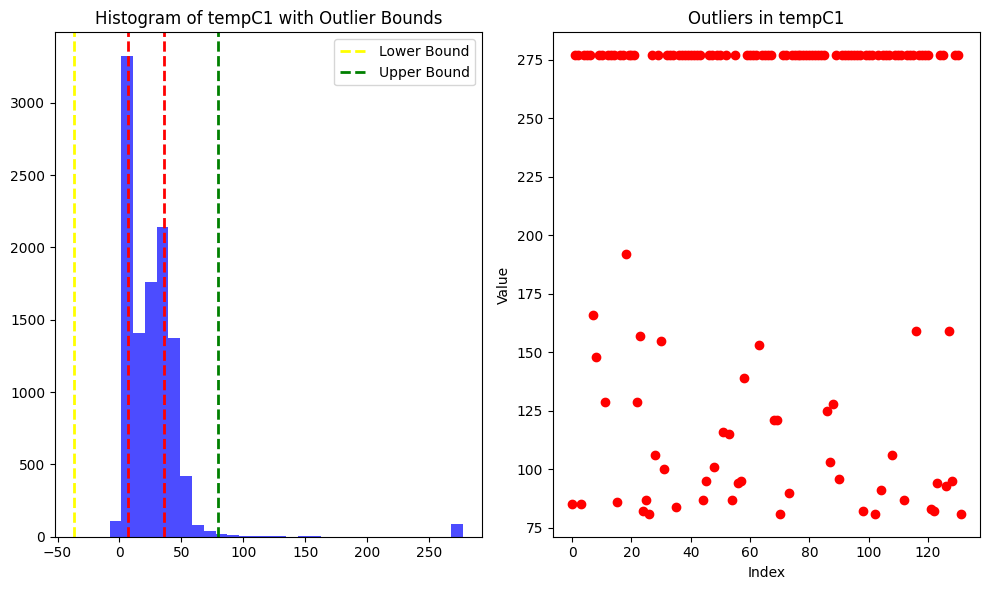

Outlier values:
64       85
94      277
149     277
184      85
198     277
       ... 
5914    159
5922     95
5928    277
5933    277
5952     81
Name: tempC1, Length: 132, dtype: int64


In [ ]:
find_outliers(sheet2_data, sensor_name="tempC1")

In [ ]:
# handling outliers for tempC1
handling_outliers(sheet2_data, sensor_name="tempC1")

<ipython-input-26-d352a4265a0f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_data.loc[outliers.index] = non_outlier_mean


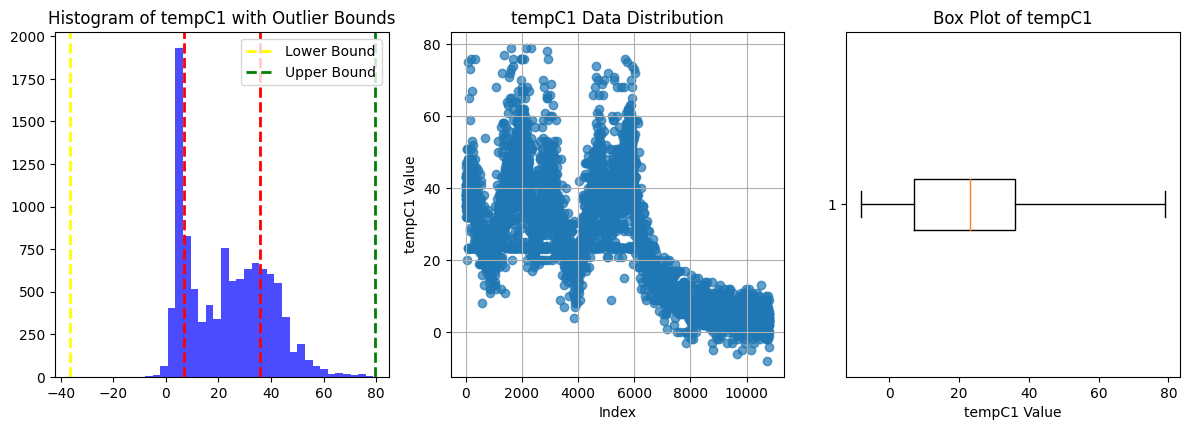

In [ ]:
# check data distribution after handling outliers.
check_data_distribution(sheet2_data, sensor_name="tempC1")


####  No outliers exists that can make out dataset skewed. Ready for further processing

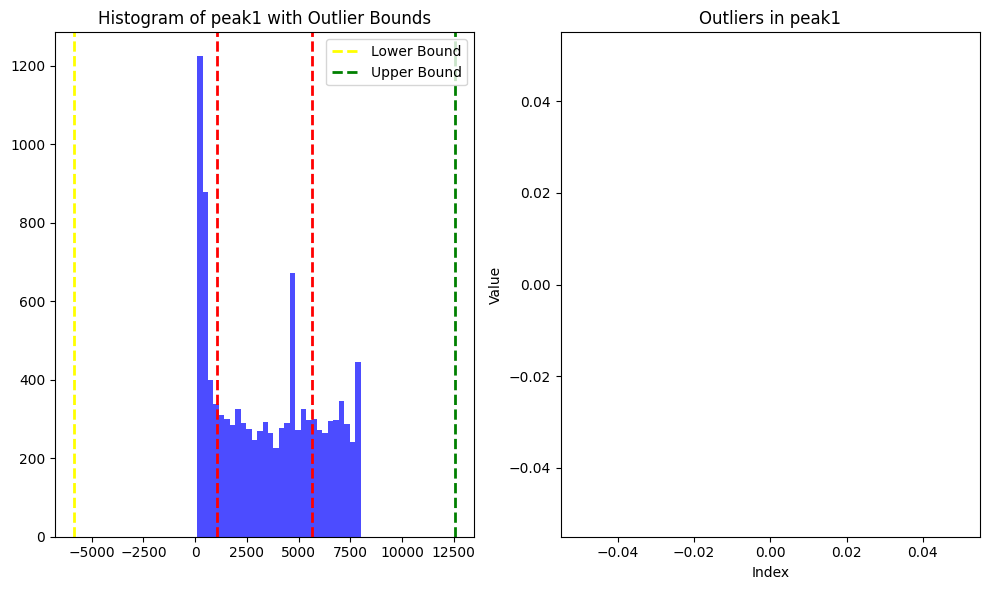

Outlier values:
Series([], Name: peak1, dtype: int64)


In [ ]:
find_outliers(sheet2_data, sensor_name="peak1")

### comment: No outliers in peak1 feature

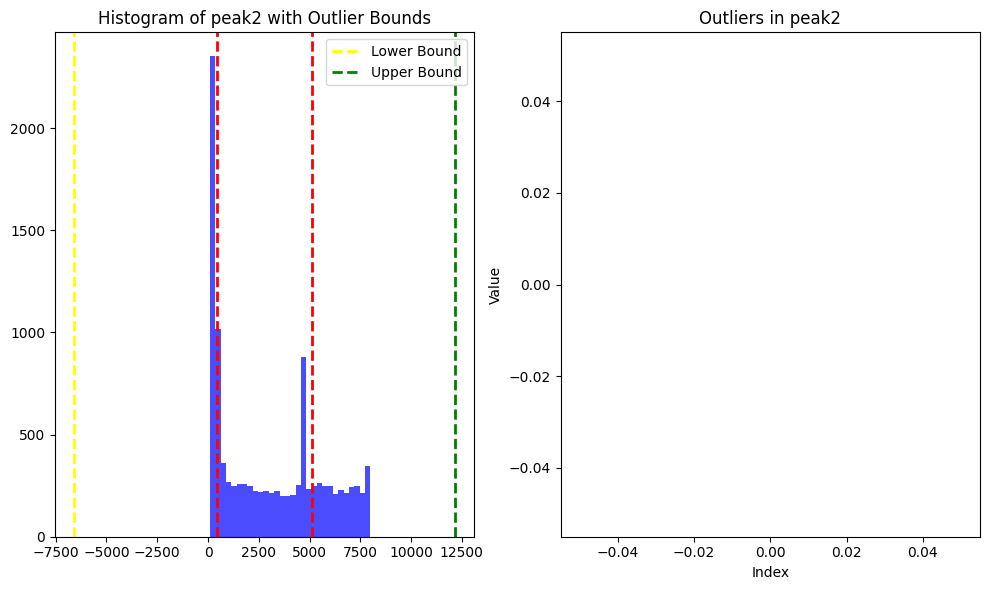

Outlier values:
Series([], Name: peak2, dtype: int64)


In [ ]:
find_outliers(sheet2_data, sensor_name="peak2")

### comment: No outliers in peak2 feature

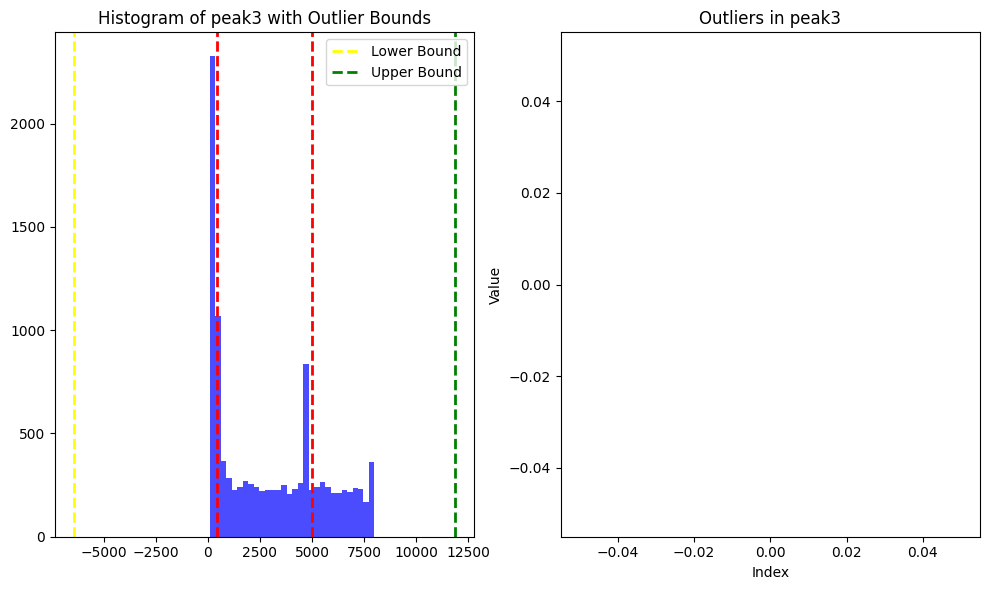

Outlier values:
Series([], Name: peak3, dtype: int64)


In [ ]:
find_outliers(sheet2_data, sensor_name="peak3")

### comment: No outliers in peak3 feature

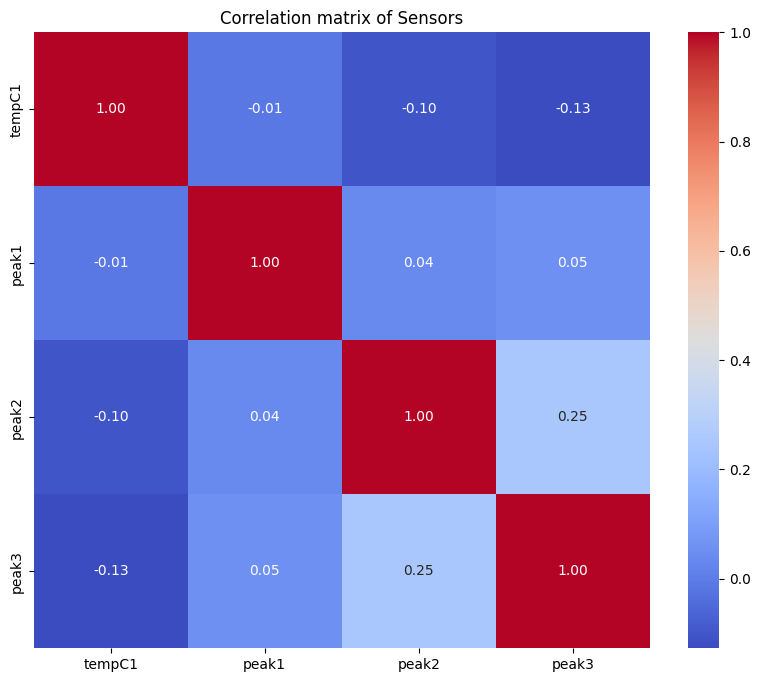

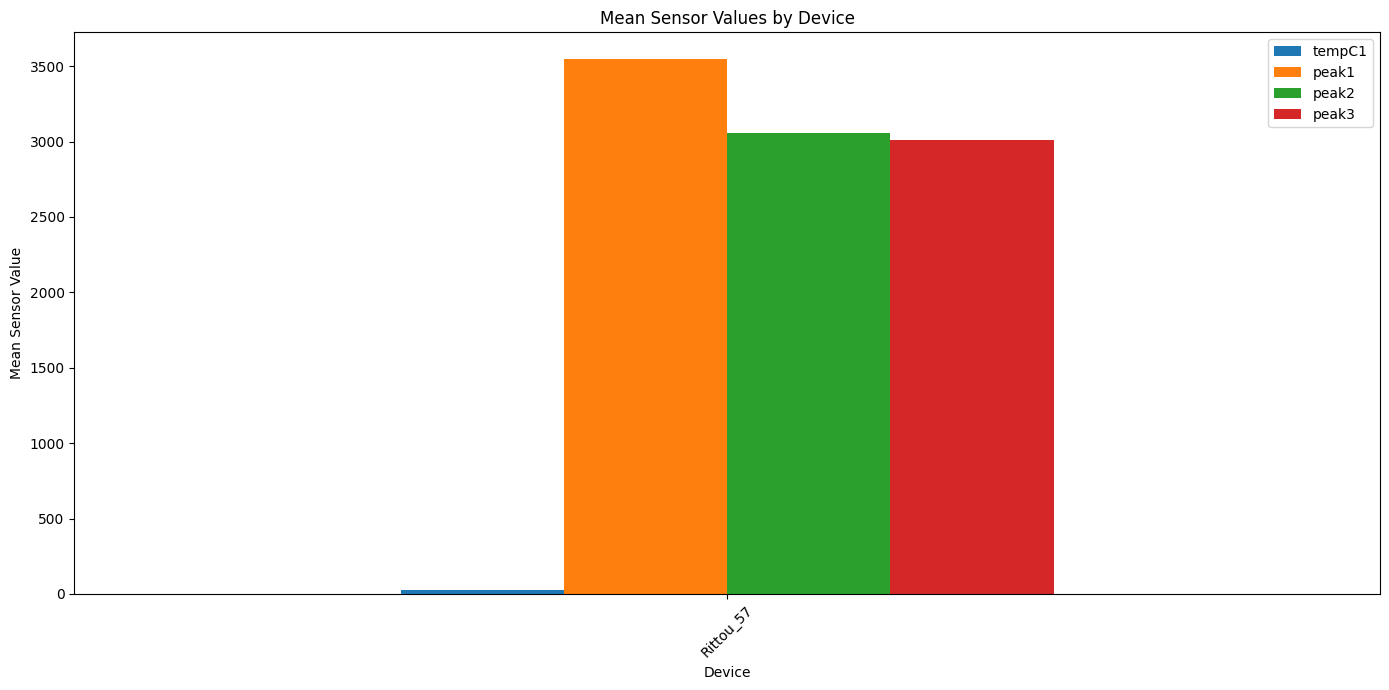

In [ ]:
# Program to find correlation between tempreature and vibration of three vibrations sensors.

data_copy = sheet2_data.copy()
if 'time' in data_copy.columns and data_copy['time'].dtype == 'object':
    data_copy['time'] = pd.to_datetime(data_copy['time'], utc=True)

if 'time' in data_copy.columns:                                   # Set 'time' as the index of the copied DataFrame
    data_copy.set_index('time', inplace=True)

correlation_matrix = sheet2_data[['tempC1', 'peak1', 'peak2', 'peak3']].corr()# Calculatation of  correlation matrix


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True) #Plotting correlation matrix as heatmap
plt.title('Correlation matrix of Sensors')
plt.show()

# calculation and visualization the mean sensor values by device:
grouped_data = sheet2_data.groupby('device')[['tempC1', 'peak1', 'peak2', 'peak3']].mean()

# Plot the mean sensor values by device using bar plots
grouped_data.plot(kind='bar', figsize=(14, 7))
plt.title('Mean Sensor Values by Device')
plt.ylabel('Mean Sensor Value')
plt.xlabel('Device')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Coomment: Negative and very weak postivite correlation among the features

### **Now we will work on dataset 3**

In [ ]:
# Finding out the features(columns) and corresponding datatypes in our data
for col in sheet3_data.columns:
  print(col)
print("data types:\n",sheet3_data.dtypes)

device
time
tempC1
peak1
peak2
peak3
data types:
 device     object
time       object
tempC1    float64
peak1       int64
peak2       int64
peak3       int64
dtype: object


In [ ]:
# Here we will check for missing values in our entire data
null=pd.isnull(sheet3_data)
null.sum().sum()

11

In [ ]:
missing_vals=['NA','',None,np.NaN]
missing_counts = sheet3_data.iloc[:, 2:].isin(missing_vals).sum()# Counting missing values in columns 3 to 5
for column, missing_count in missing_counts.items():
    print(f"Column '{column}' has {missing_count} missing values.")

Column 'tempC1' has 11 missing values.
Column 'peak1' has 0 missing values.
Column 'peak2' has 0 missing values.
Column 'peak3' has 0 missing values.


#### **There are multiple ways to handle missing values, here we will replace missing values by mode of the remaining values**

In [ ]:
mode_value = sheet3_data["tempC1"].mode()[0]  # we will use the first mode if multiple modes exists

sheet3_data["tempC1"].fillna(mode_value, inplace=True)

# Check for remaining missing values
print(sheet3_data["tempC1"].isnull().sum())  # Should provide output 0 if correctly replaced


0


#### Now we will check for outliers

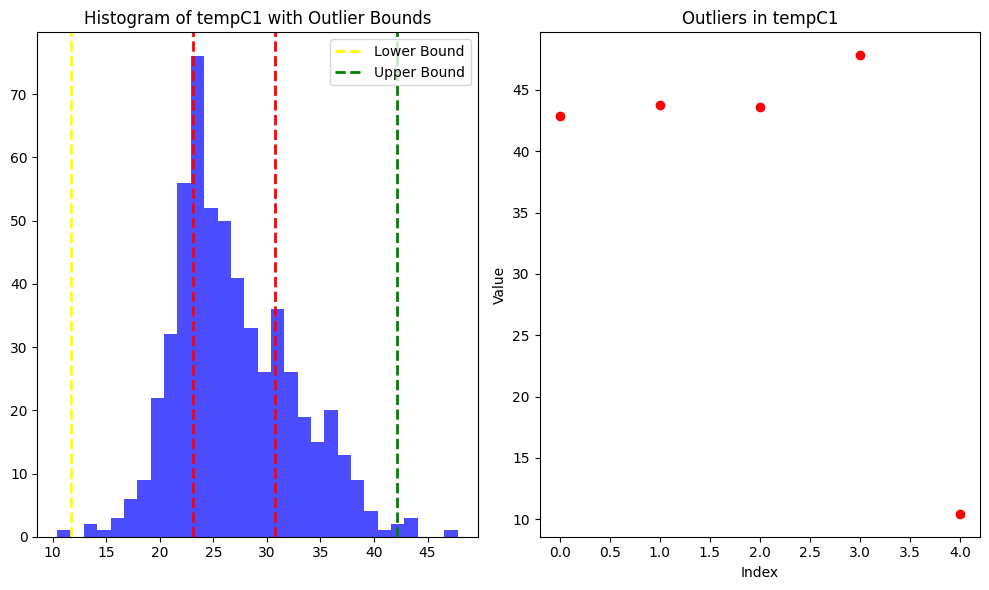

Outlier values:
13     42.901176
72     43.770348
114    43.594200
118    47.817528
530    10.444696
Name: tempC1, dtype: float64


In [ ]:
# finding outliers for tempC1
find_outliers(sheet3_data, sensor_name="tempC1")

In [ ]:
# handling outliers for tempC1
handling_outliers(sheet3_data, sensor_name="tempC1")

<ipython-input-26-d352a4265a0f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_data.loc[outliers.index] = non_outlier_mean


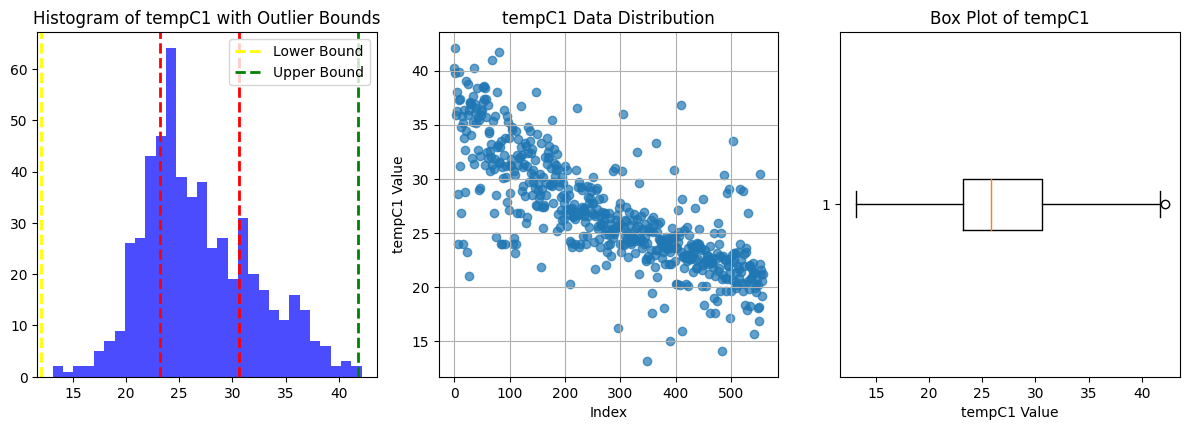

In [ ]:
# check data distribution after handling outliers.
check_data_distribution(sheet3_data, sensor_name="tempC1")

#### **Comment: significant Outliers are mostly eliminated**

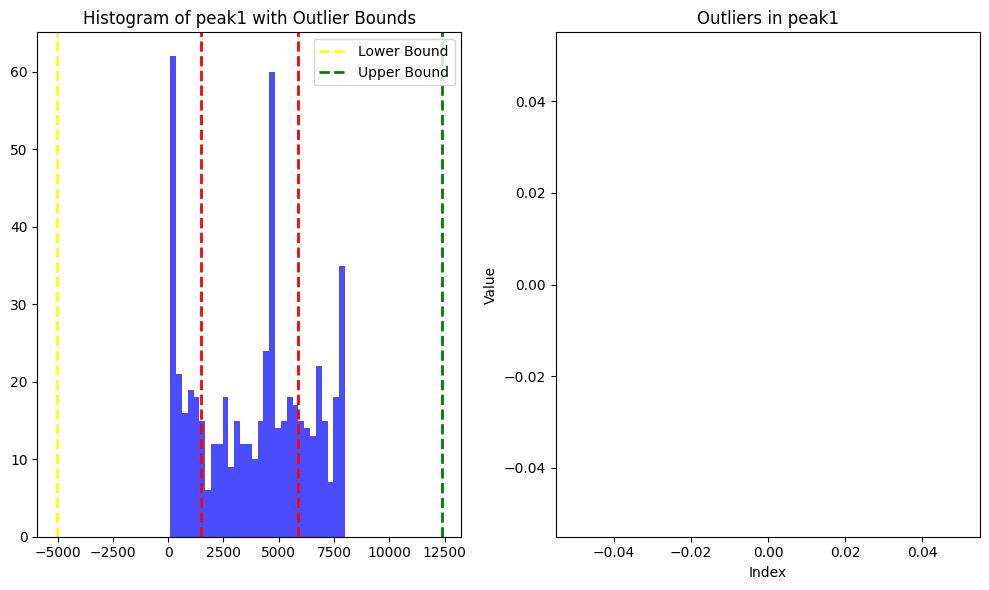

Outlier values:
Series([], Name: peak1, dtype: int64)


In [ ]:
# finding outliers for peak1
find_outliers(sheet3_data, sensor_name="peak1")

#### No outliers Found!!

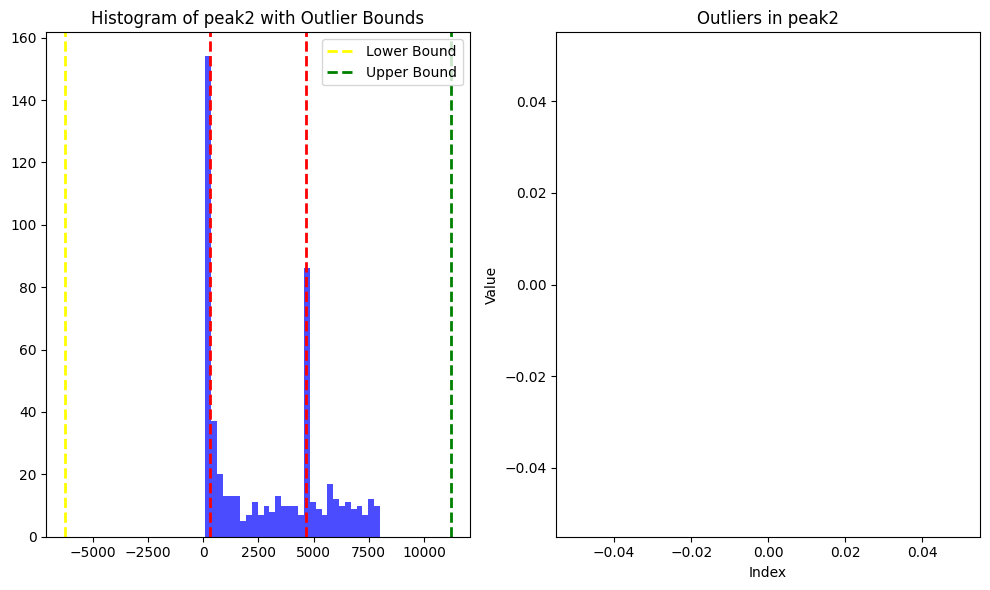

Outlier values:
Series([], Name: peak2, dtype: int64)


In [ ]:
# finding outliers for peak2
find_outliers(sheet3_data, sensor_name="peak2")

#### No outliers Found!!

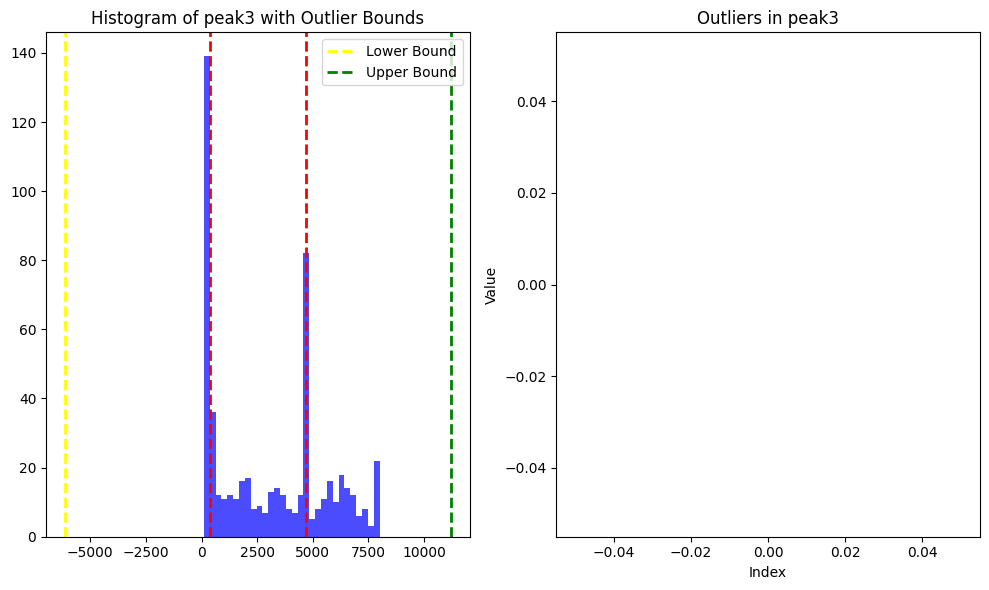

Outlier values:
Series([], Name: peak3, dtype: int64)


In [ ]:
# finding outliers for peak3
find_outliers(sheet3_data, sensor_name="peak3")

#### No outliers Found!!

## Now we will work on data of sheet 4

In [ ]:
# Finding out the features(columns) and corresponding datatypes in our data
for col in sheet4_data.columns:
  print(col)
print("data types:\n",sheet4_data.dtypes)

device
time
tempC1
peak1
peak2
peak3
data types:
 device     object
time       object
tempC1    float64
peak1       int64
peak2       int64
peak3       int64
dtype: object


In [ ]:
missing_vals=['NA','',None,np.NaN]
missing_counts = sheet4_data.iloc[:, 2:].isin(missing_vals).sum()# Counting missing values in columns 3 to 5
for column, missing_count in missing_counts.items():
    print(f"Column '{column}' has {missing_count} missing values.")

Column 'tempC1' has 17 missing values.
Column 'peak1' has 0 missing values.
Column 'peak2' has 0 missing values.
Column 'peak3' has 0 missing values.


##### **'tempC1' has 17 missing values.we will replace these values by mode of the remaing values**






In [ ]:
mode_value = sheet4_data["tempC1"].mode()[0]  # we will use the first mode if multiple modes exists

sheet4_data["tempC1"].fillna(mode_value, inplace=True)

# Check for remaining missing values
print(sheet4_data["tempC1"].isnull().sum())  # Should provide output 0 if correctly replaced

0


### Now we will check for outliers

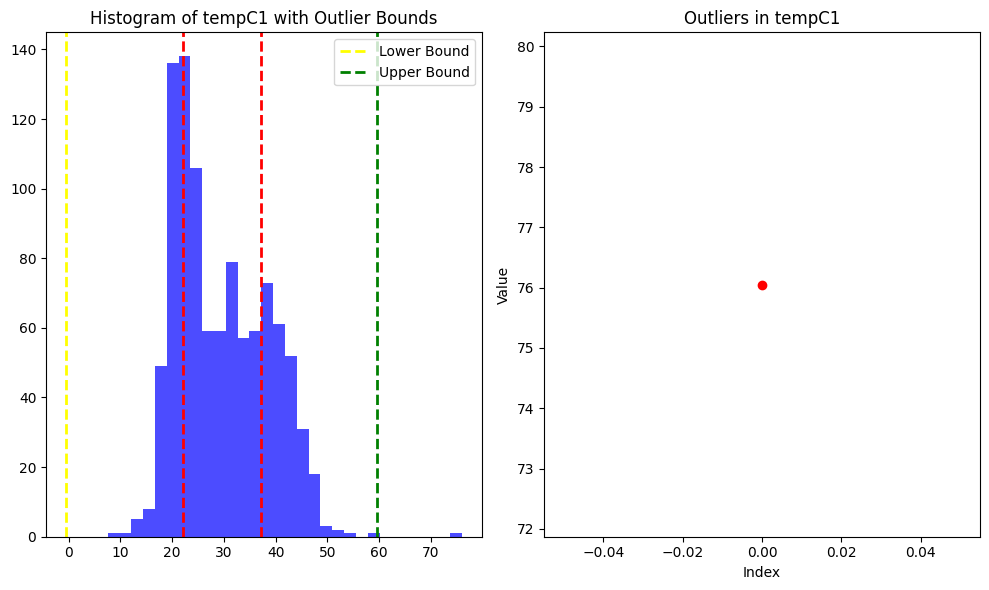

Outlier values:
201    76.05175
Name: tempC1, dtype: float64


In [ ]:
find_outliers(sheet4_data, sensor_name="tempC1")

In [ ]:
# handling outliers for tempC1
handling_outliers(sheet4_data, sensor_name="tempC1")

<ipython-input-26-d352a4265a0f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_data.loc[outliers.index] = non_outlier_mean


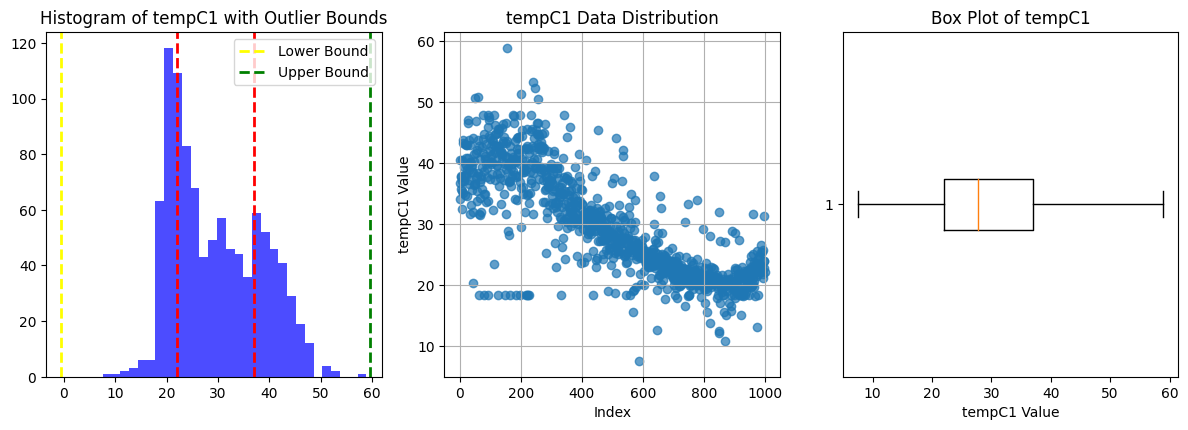

In [ ]:
# check data distribution after handling outliers.
check_data_distribution(sheet4_data, sensor_name="tempC1")

#### **Existing outliers are eliminated**

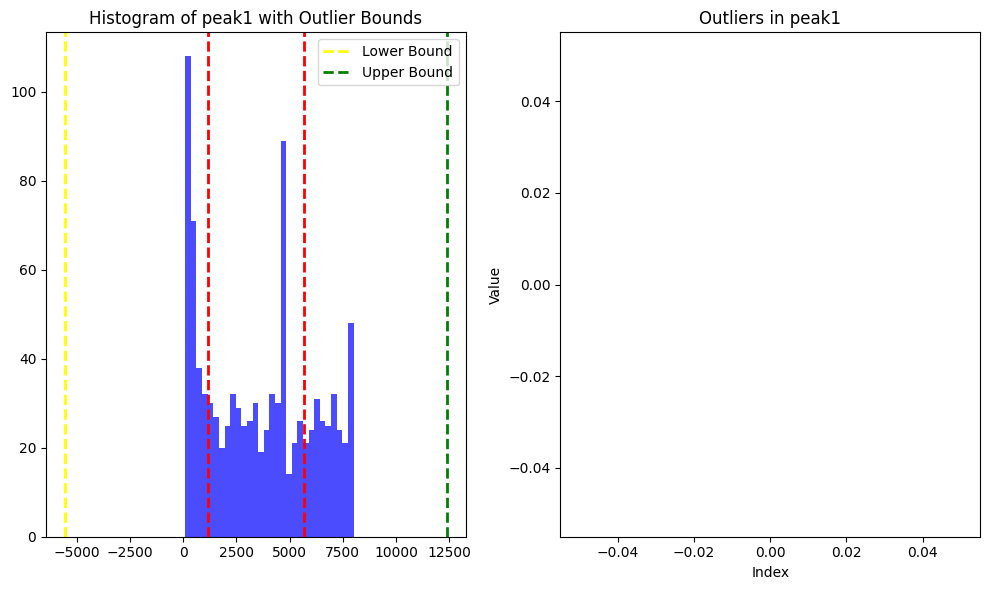

Outlier values:
Series([], Name: peak1, dtype: int64)


In [ ]:
find_outliers(sheet4_data, sensor_name="peak1")

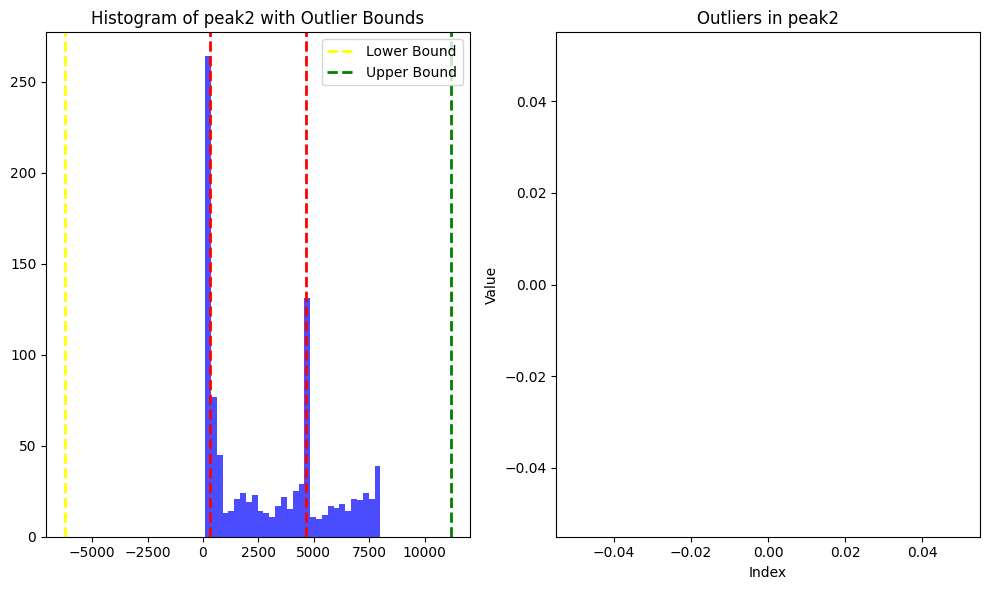

Outlier values:
Series([], Name: peak2, dtype: int64)


In [ ]:
find_outliers(sheet4_data, sensor_name="peak2")

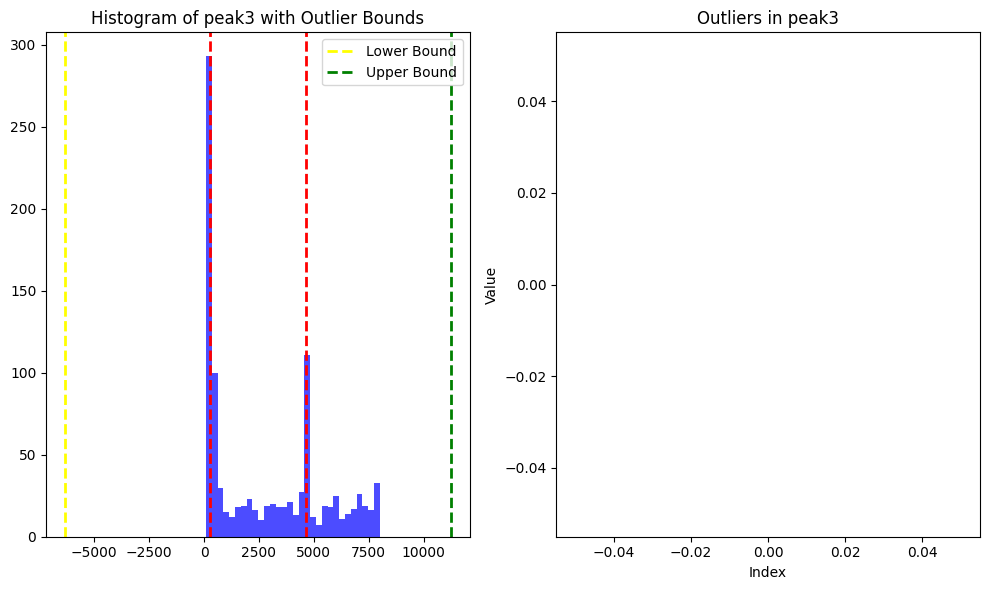

Outlier values:
Series([], Name: peak3, dtype: int64)


In [ ]:
find_outliers(sheet4_data, sensor_name="peak3")

#### **Comment: No outliers Found in peak1,peak2,peak3 features**

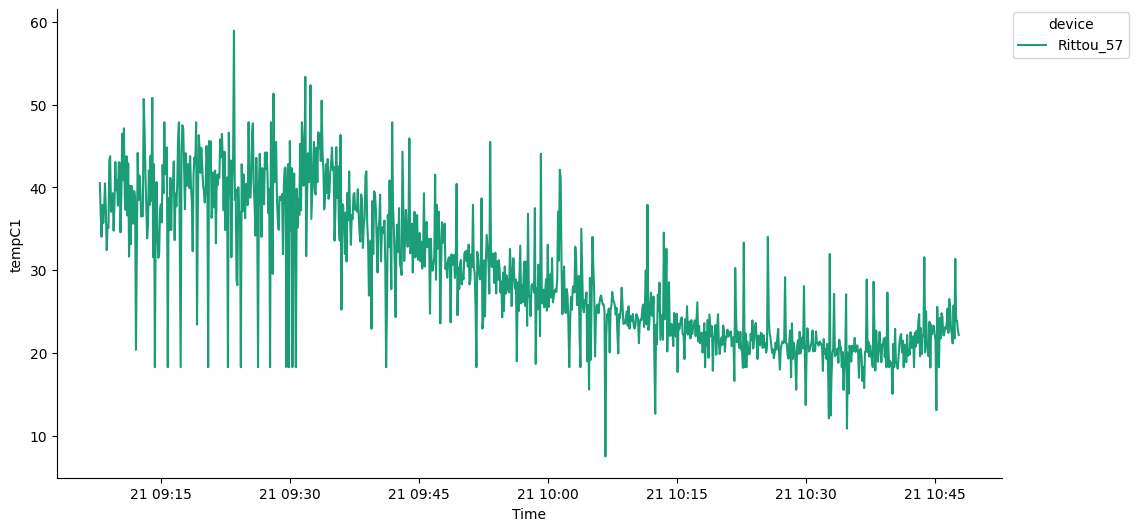

In [ ]:
import pandas as pd
from datetime import datetime

sheet4_data['datetime'] = sheet4_data['time'].apply(lambda x: datetime.combine(datetime.today().date(), x)) # 'time' is in 'HH:MM:SS' format in our data

def _plot_series(series, series_name, series_index=0):
    from matplotlib import pyplot as plt
    import seaborn as sns
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['datetime']
    ys = series['tempC1']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sheet4_data.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('device')):
    _plot_series(series, series_name, i)
    fig.legend(title='device', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('tempC1')
plt.show()


## Now we will work on data of sheet 6


In [ ]:
for col in sheet6_data.columns:
  print(col)
print("data types:\n",sheet6_data.dtypes)

device
time
tempC1
peak1
peak2
peak3
threshold
peak1.1
threshold.1
data types:
 device          object
time            object
tempC1         float64
peak1          float64
peak2          float64
peak3          float64
threshold        int64
peak1.1        float64
threshold.1      int64
dtype: object


##### **we will check for missing values**

In [ ]:
missing_vals=['NA','',None,np.NaN]
missing_counts = sheet6_data.iloc[:, 2:].isin(missing_vals).sum()# Counting missing values in columns 3 to end
for column, missing_count in missing_counts.items():
    print(f"Column '{column}' has {missing_count} missing values.")

Column 'tempC1' has 11 missing values.
Column 'peak1' has 455 missing values.
Column 'peak2' has 344 missing values.
Column 'peak3' has 367 missing values.
Column 'threshold' has 0 missing values.
Column 'peak1.1' has 457 missing values.
Column 'threshold.1' has 0 missing values.


#### 'tempC1' has 11 missing values.
#### 'peak1' has 455 missing values.
#### 'peak2' has 344 missing values.
#### 'peak3' has 367 missing values.
#### 'peak1.1' has 457 missing values.

#### Another possible solution: we will replace these values by mean of the reamining values

In [ ]:
columns_to_impute = ["peak1", "peak2", "peak3", "peak1.1"]

for column in columns_to_impute:                                          # Replace missing values with mean for each column
    sheet6_data[column].fillna(sheet6_data[column].mean(), inplace=True)

for column in columns_to_impute:
    print(f"Number of missing values in '{column}' after imputation: {sheet6_data[column].isnull().sum()}")


Number of missing values in 'peak1' after imputation: 0
Number of missing values in 'peak2' after imputation: 0
Number of missing values in 'peak3' after imputation: 0
Number of missing values in 'peak1.1' after imputation: 0


#### **Now we will check for outliers**

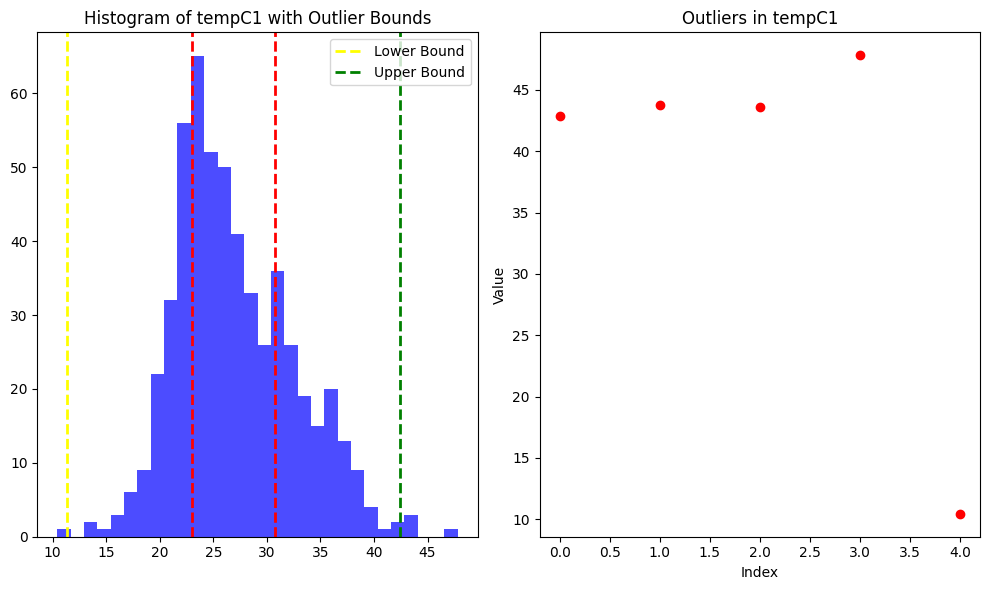

Outlier values:
13     42.901176
72     43.770348
114    43.594200
118    47.817528
530    10.444696
Name: tempC1, dtype: float64


In [ ]:
find_outliers(sheet6_data, sensor_name="tempC1")

In [ ]:
# handling outliers for tempC1
handling_outliers(sheet6_data, sensor_name="tempC1")

<ipython-input-26-d352a4265a0f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_data.loc[outliers.index] = non_outlier_mean


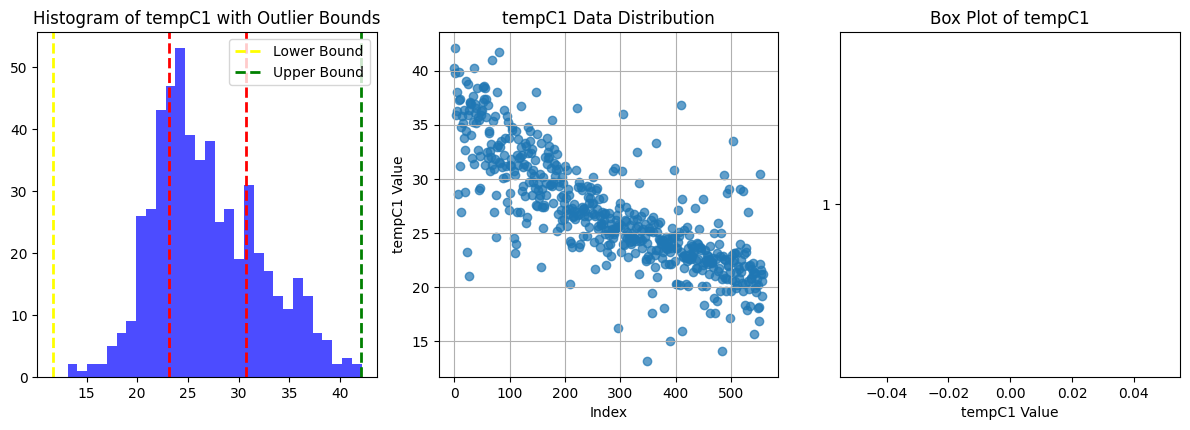

In [ ]:
#check data distribution after handling outliers.
check_data_distribution(sheet6_data, sensor_name="tempC1")

#### Outliers Removed!!

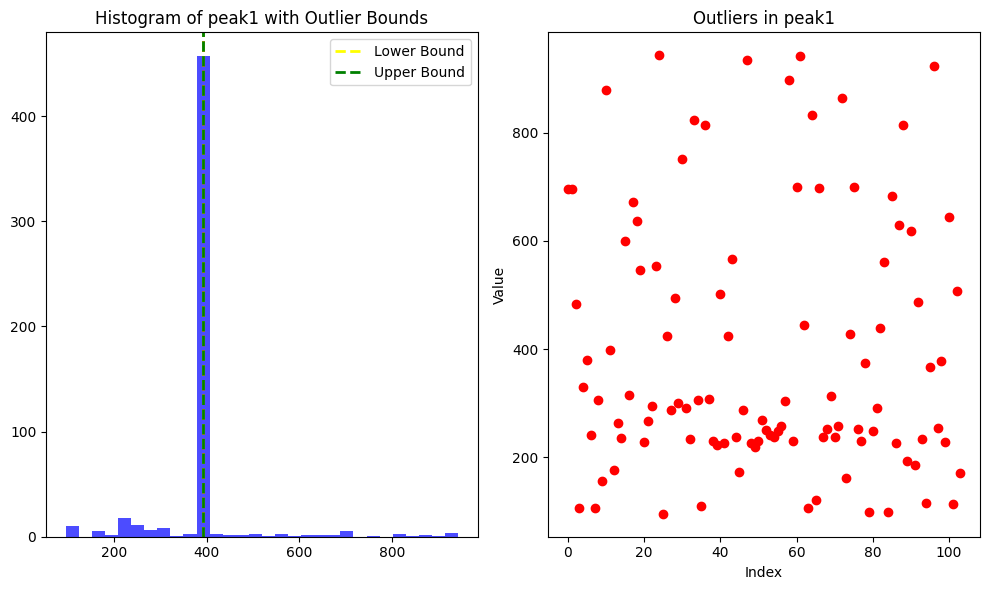

Outlier values:
0      696.0
1      696.0
2      484.0
4      106.0
5      330.0
       ...  
542    229.0
554    644.0
556    115.0
557    508.0
558    172.0
Name: peak1, Length: 104, dtype: float64


In [ ]:
find_outliers(sheet6_data, sensor_name="peak1")

In [ ]:
# handling outliers for peak1
handling_outliers(sheet6_data, sensor_name="peak1")

<ipython-input-26-d352a4265a0f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_data.loc[outliers.index] = non_outlier_mean


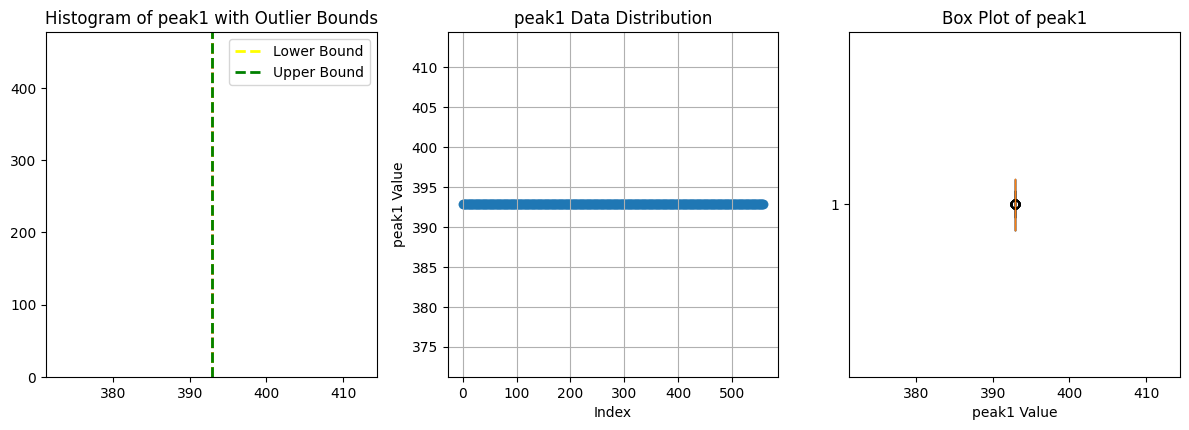

In [ ]:
#check data distribution after handling outliers.
check_data_distribution(sheet6_data, sensor_name="peak1")

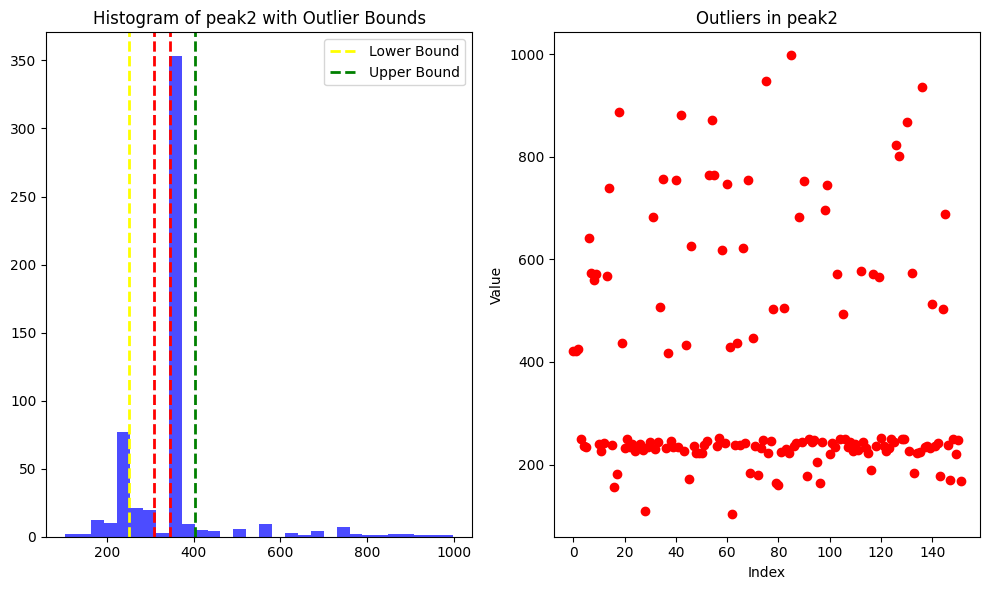

Outlier values:
0      422.0
3      422.0
4      426.0
5      249.0
14     236.0
       ...  
546    169.0
548    250.0
549    220.0
555    247.0
557    167.0
Name: peak2, Length: 152, dtype: float64


In [ ]:
# check outliers for features peak2
find_outliers(sheet6_data, sensor_name="peak2")

In [ ]:
# handling outliers for peak1
handling_outliers(sheet6_data, sensor_name="peak2")

<ipython-input-26-d352a4265a0f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_data.loc[outliers.index] = non_outlier_mean


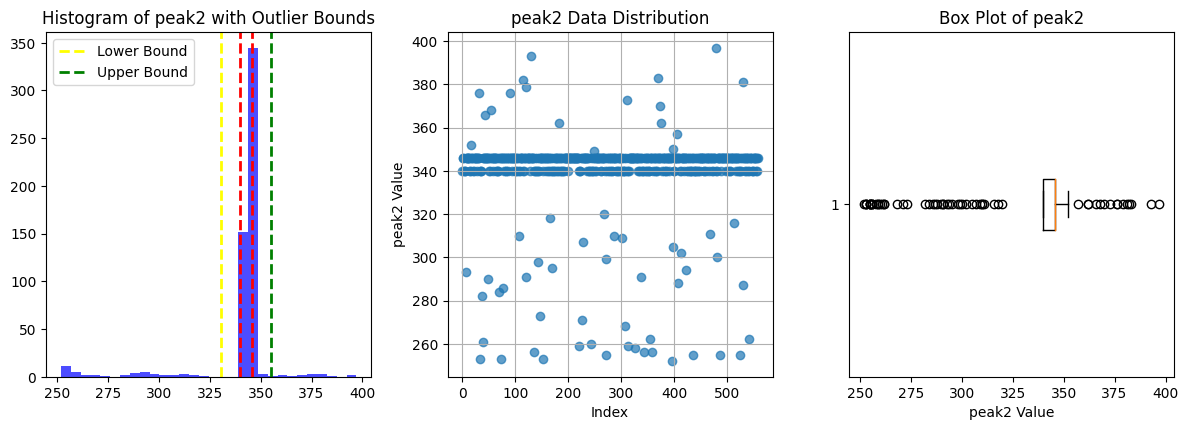

In [ ]:
#check data distribution after handling outliers.
check_data_distribution(sheet6_data, sensor_name="peak2")

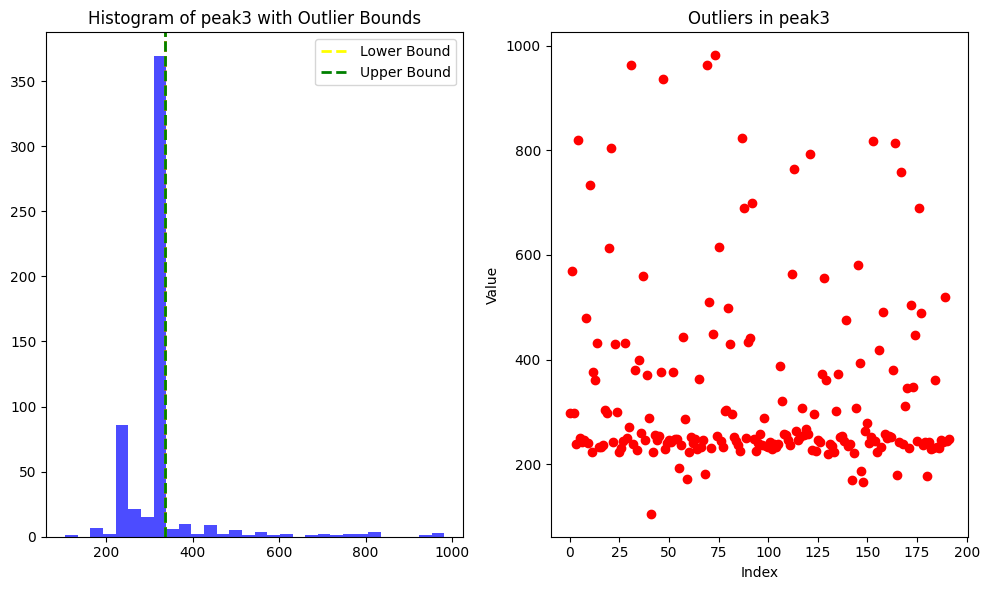

Outlier values:
0      297.0
1      570.0
4      297.0
5      238.0
11     820.0
       ...  
548    246.0
549    243.0
550    519.0
554    244.0
555    249.0
Name: peak3, Length: 192, dtype: float64


In [ ]:
# check outliers for features peak3
find_outliers(sheet6_data, sensor_name="peak3")

In [ ]:
# handling outliers for peak3
handling_outliers(sheet6_data, sensor_name="peak3")

<ipython-input-26-d352a4265a0f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_data.loc[outliers.index] = non_outlier_mean


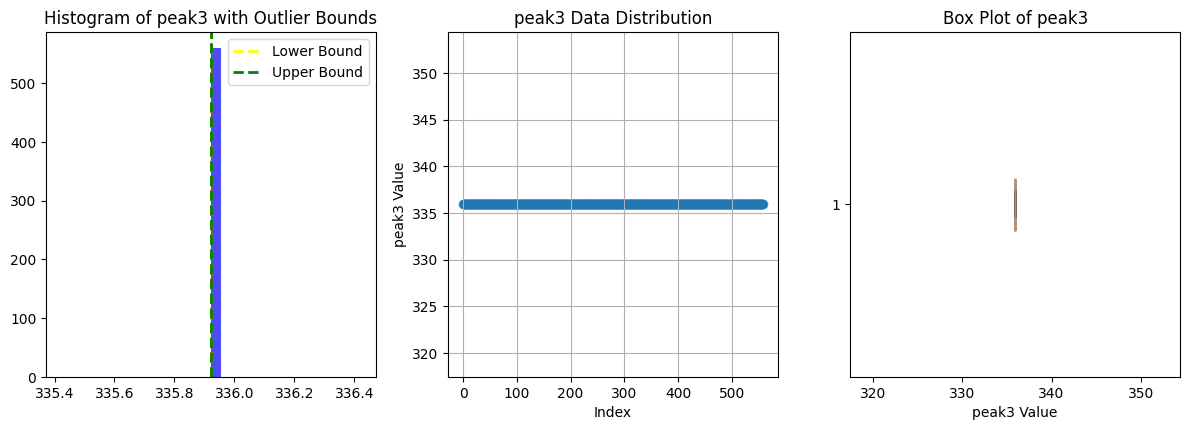

In [ ]:
#check data distribution after handling outliers.
check_data_distribution(sheet6_data, sensor_name="peak3")

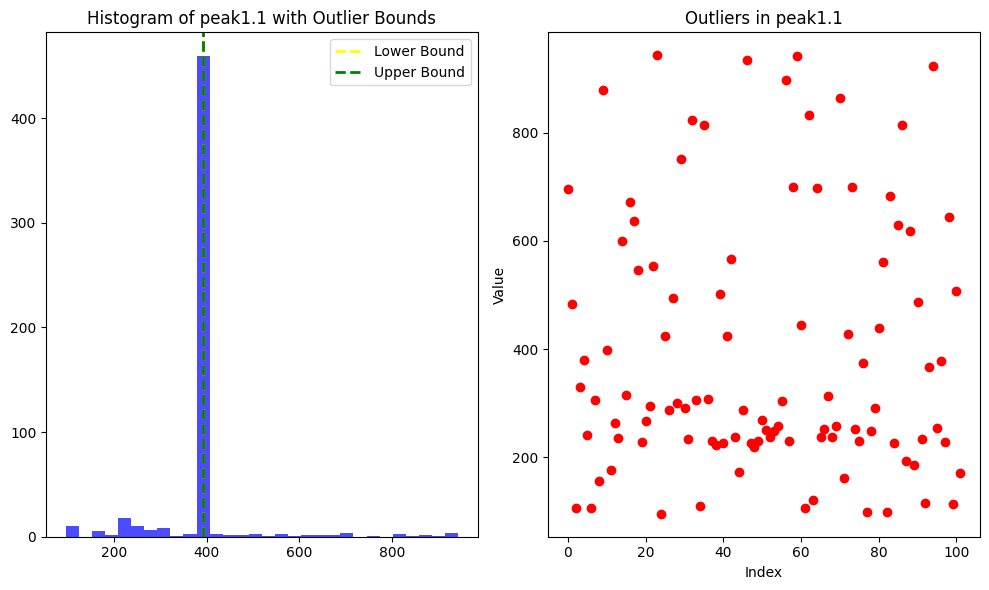

Outlier values:
0      696.0
1      484.0
2      106.0
3      330.0
4      380.0
       ...  
97     229.0
98     644.0
99     115.0
100    508.0
101    172.0
Name: peak1.1, Length: 102, dtype: float64


In [ ]:
# check outliers for features peak1.1
find_outliers(sheet6_data, sensor_name="peak1.1")

In [ ]:
# handling outliers for peak1.1
handling_outliers(sheet6_data, sensor_name="peak1.1")

<ipython-input-26-d352a4265a0f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_data.loc[outliers.index] = non_outlier_mean


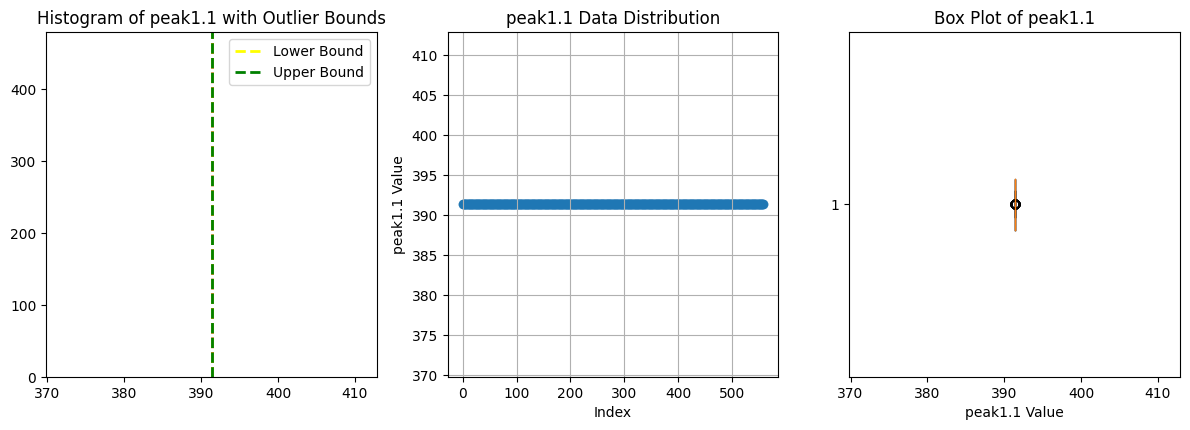

In [ ]:
#check data distribution after handling outliers.
check_data_distribution(sheet6_data, sensor_name="peak1.1")

### **The data distribution of peak1.1 ,peak3,peak2,peak1 are such beacuse they had a lots of missing data and we replaced that data by the mwan value of the remaining data for each corresponding column.**

# Thank You